In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.metrics import accuracy_score, f1_score, ConfusionMatrixDisplay, RocCurveDisplay
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) # to avoid deprecation warnings
warnings.filterwarnings('ignore') # no more warnings 
pd.set_option('display.max_columns', None) # displays all columns in dfs

import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio

In [2]:
dataset = pd.read_csv('startup data.csv')

In [3]:
dataset

,Unnamed: 0,state_code,latitude,longitude,zip_code,id,city,Unnamed: 6,name,labels,founded_at,closed_at,first_funding_at,last_funding_at,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,state_code.1,is_CA,is_NY,is_MA,is_TX,is_otherstate,category_code,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,object_id,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500,status
0,1005,CA,42.358880,-71.056820,92101,c:6669,San Diego,NaN,Bandsintown,1,1/1/2007,NaN,4/1/2009,1/1/2010,2.2493,3.0027,4.6685,6.7041,3,3,375000,3,CA,1,0,0,0,0,music,0,0,0,0,0,0,0,0,0,1,c:6669,0,1,0,0,0,0,1.0000,0,acquired
1,204,CA,37.238916,-121.973718,95032,c:16283,Los Gatos,NaN,TriCipher,1,1/1/2000,NaN,2/14/2005,12/28/2009,5.1260,9.9973,7.0055,7.0055,9,4,40100000,1,CA,1,0,0,0,0,enterprise,0,0,0,1,0,0,0,0,0,0,c:16283,1,0,0,1,1,1,4.7500,1,acquired
2,1001,CA,32.901049,-117.192656,92121,c:65620,San Diego,San Diego CA 92121,Plixi,1,3/18/2009,NaN,3/30/2010,3/30/2010,1.0329,1.0329,1.4575,2.2055,5,1,2600000,2,CA,1,0,0,0,0,web,0,1,0,0,0,0,0,0,0,0,c:65620,0,0,1,0,0,0,4.0000,1,acquired
3,738,CA,37.320309,-122.050040,95014,c:42668,Cupertino,Cupertino CA 95014,Solidcore Systems,1,1/1/2002,NaN,2/17/2005,4/25/2007,3.1315,5.3151,6.0027,6.0027,5,3,40000000,1,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:42668,0,0,0,1,1,1,3.3333,1,acquired
4,1002,CA,37.779281,-122.419236,94105,c:65806,San Francisco,San Francisco CA 94105,Inhale Digital,0,8/1/2010,10/1/2012,8/1/2010,4/1/2012,0.0000,1.6685,0.0384,0.0384,2,2,1300000,1,CA,1,0,0,0,0,games_video,0,0,0,0,0,1,0,0,0,0,c:65806,1,1,0,0,0,0,1.0000,1,closed
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,352,CA,37.740594,-122.376471,94107,c:21343,San Francisco,NaN,CoTweet,1,1/1/2009,NaN,7/9/2009,7/9/2009,0.5178,0.5178,0.5808,4.5260,9,1,1100000,2,CA,1,0,0,0,0,advertising,0,0,0,0,1,0,0,0,0,0,c:21343,0,0,1,0,0,0,6.0000,1,acquired
919,721,MA,42.504817,-71.195611,1803,c:41747,Burlington,Burlington MA 1803,Reef Point Systems,0,1/1/1998,6/25/2008,4/1/2005,3/23/2007,7.2521,9.2274,6.0027,6.0027,1,3,52000000,1,MA,0,0,1,0,0,security,0,0,0,0,0,0,0,0,0,1,c:41747,1,0,0,1,0,0,2.6667,1,closed
920,557,CA,37.408261,-122.015920,94089,c:31549,Sunnyvale,NaN,Paracor Medical,0,1/1/1999,6/17/2012,6/29/2007,6/29/2007,8.4959,8.4959,9.0055,9.0055,5,1,44000000,1,CA,1,0,0,0,0,biotech,0,0,0,0,0,0,0,1,0,0,c:31549,0,0,0,0,0,1,8.0000,1,closed
921,589,CA,37.556732,-122.288378,94404,c:33198,San Francisco,NaN,Causata,1,1/1/2009,NaN,10/5/2009,11/1/2011,0.7589,2.8329,0.7589,3.8356,12,2,15500000,2,CA,1,0,0,0,0,software,1,0,0,0,0,0,0,0,0,0,c:33198,0,0,1,1,0,0,1.0000,1,acquired


In [4]:
dataset.rename(columns={'labels':'is_acquired'}, inplace=True)

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 49 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                923 non-null    int64  
 1   state_code                923 non-null    object 
 2   latitude                  923 non-null    float64
 3   longitude                 923 non-null    float64
 4   zip_code                  923 non-null    object 
 5   id                        923 non-null    object 
 6   city                      923 non-null    object 
 7   Unnamed: 6                430 non-null    object 
 8   name                      923 non-null    object 
 9   is_acquired               923 non-null    int64  
 10  founded_at                923 non-null    object 
 11  closed_at                 335 non-null    object 
 12  first_funding_at          923 non-null    object 
 13  last_funding_at           923 non-null    object 
 14  age_first_

In [6]:
dataset.is_acquired.value_counts()

1    597
0    326
Name: is_acquired, dtype: int64

In [7]:
dataset.describe()

,Unnamed: 0,latitude,longitude,is_acquired,age_first_funding_year,age_last_funding_year,age_first_milestone_year,age_last_milestone_year,relationships,funding_rounds,funding_total_usd,milestones,is_CA,is_NY,is_MA,is_TX,is_otherstate,is_software,is_web,is_mobile,is_enterprise,is_advertising,is_gamesvideo,is_ecommerce,is_biotech,is_consulting,is_othercategory,has_VC,has_angel,has_roundA,has_roundB,has_roundC,has_roundD,avg_participants,is_top500
count,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,771.000000,771.000000,923.000000,923.000000,9.230000e+02,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.00000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000,923.000000
mean,572.297941,38.517442,-103.539212,0.646804,2.235630,3.931456,3.055353,4.754423,7.710726,2.310943,2.541975e+07,1.841820,0.527627,0.114843,0.089924,0.045504,0.221018,0.165764,0.156013,0.08559,0.079090,0.067172,0.056338,0.027086,0.036836,0.003250,0.322860,0.326111,0.254605,0.508126,0.392199,0.232936,0.099675,2.838586,0.809317
std,333.585431,3.741497,22.394167,0.478222,2.510449,2.967910,2.977057,3.212107,7.265776,1.390922,1.896344e+08,1.322632,0.499507,0.319005,0.286228,0.208519,0.415158,0.372070,0.363064,0.27991,0.270025,0.250456,0.230698,0.162421,0.188462,0.056949,0.467823,0.469042,0.435875,0.500205,0.488505,0.422931,0.299729,1.874601,0.393052
min,1.000000,25.752358,-122.756956,0.000000,-9.046600,-9.046600,-14.169900,-7.005500,0.000000,1.000000,1.100000e+04,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,283.500000,37.388869,-122.198732,0.000000,0.576700,1.669850,1.000000,2.411000,3.000000,1.000000,2.725000e+06,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.500000,1.000000
50%,577.000000,37.779281,-118.374037,1.000000,1.446600,3.528800,2.520500,4.476700,5.000000,2.000000,1.000000e+07,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,2.500000,1.000000
75%,866.500000,40.730646,-77.214731,1.000000,3.575350,5.560250,4.686300,6.753400,10.000000,3.000000,2.472500e+07,3.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,3.800000,1.000000
max,1153.000000,59.335232,18.057121,1.000000,21.895900,21.895900,24.684900,24.684900,63.000000,10.000000,5.700000e+09,8.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,16.000000,1.000000


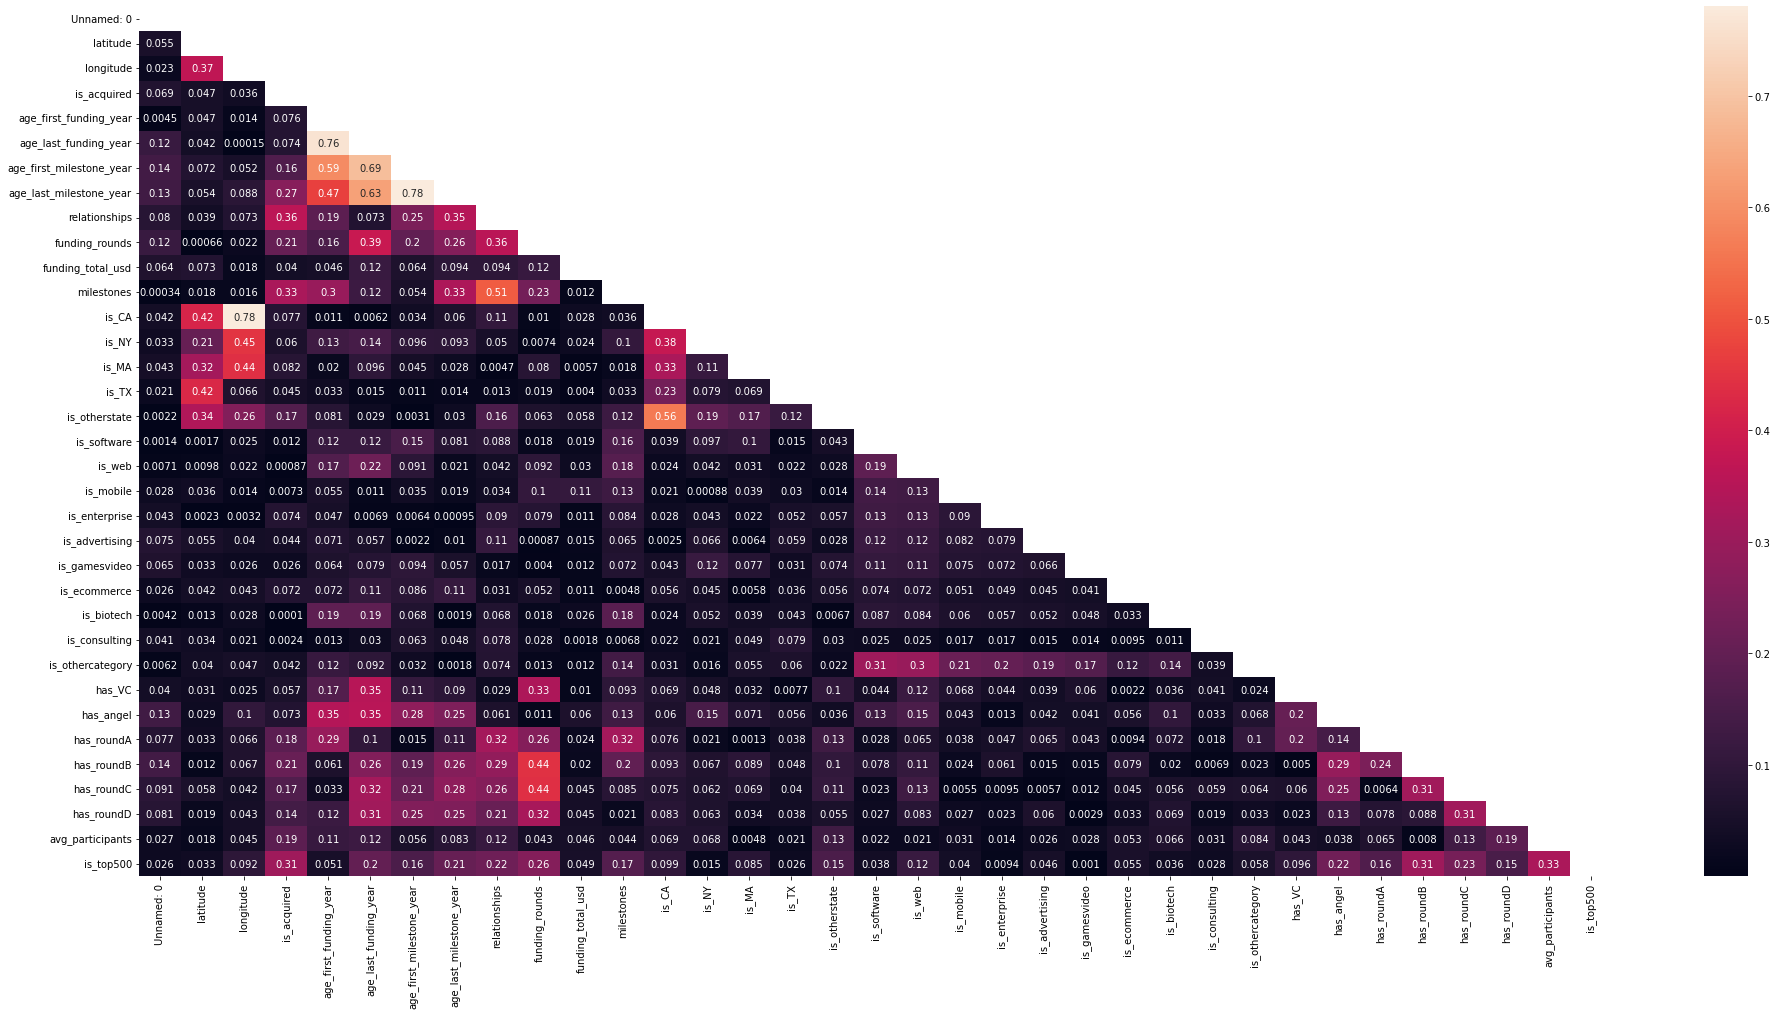

In [8]:
correlations = dataset.corr().abs()

mask = np.zeros_like(correlations)

mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

fig, ax = plt.subplots(figsize=(33, 16))
ax = sns.heatmap(correlations, mask=mask, annot=True)
plt.show()

# CLEANING

In [9]:
drop_columns = ['Unnamed: 0', 'latitude', 'longitude', 'id', 'state_code.1', 'Unnamed: 6', 'name',
                'object_id', 'status', 'is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate', 'is_software',
                'is_web', 'is_mobile', 'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce',
                'is_biotech', 'is_consulting', 'is_othercategory','closed_at', 'age_first_milestone_year',
                'age_last_milestone_year','zip_code']

#drop_columns = ['Unnamed: 0', 'latitude', 'longitude', 'id', 'state_code', 'state_code.1', 'Unnamed: 6', 'name',
#                'object_id', 'status', 'category_code', 'closed_at', 'age_first_milestone_year',
#                'age_last_milestone_year','zip_code']

#drop_columns = ['Unnamed: 0', 'latitude', 'longitude', 'id', 'state_code.1', 'Unnamed: 6', 'name',
#                'object_id', 'status', 'is_CA', 'is_NY', 'is_MA', 'is_TX', 'is_otherstate', 'is_software',
#                'is_web', 'is_mobile', 'is_enterprise', 'is_advertising', 'is_gamesvideo', 'is_ecommerce',
#                'is_biotech', 'is_consulting', 'is_othercategory','closed_at', 'age_first_milestone_year',
#                'age_last_milestone_year','zip_code']

dataset = dataset.drop(columns=drop_columns) # dropping low impact columns

In [10]:
cat_variables = dataset.select_dtypes(include=np.object)
cat_variables.columns.to_list()

['state_code',
 'city',
 'founded_at',
 'first_funding_at',
 'last_funding_at',
 'category_code']

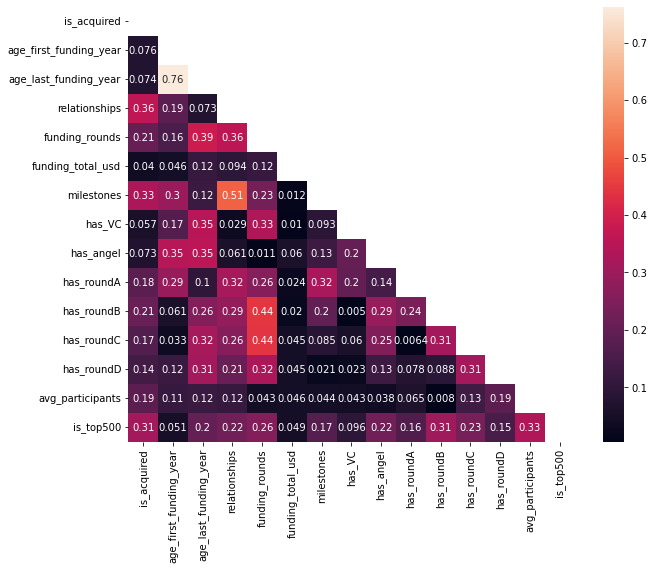

In [11]:
correlations = dataset.corr().abs()

mask = np.zeros_like(correlations)

mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(correlations, mask=mask, annot=True)
plt.show()

In [12]:
drop_columns = ['funding_total_usd', 'age_first_funding_year', 'age_last_funding_year', 'has_VC', 'has_angel']
dataset = dataset.drop(columns=drop_columns) # dropping low impact columns

In [13]:
numerical_variables = dataset[['is_acquired', 'relationships', 'funding_rounds', 'milestones', 'avg_participants']]
                               #'has_roundA','has_roundB','has_roundC','has_roundD','is_top500']]
numerical_variables

,is_acquired,relationships,funding_rounds,milestones,avg_participants
0,1,3,3,3,1.0000
1,1,9,4,1,4.7500
2,1,5,1,2,4.0000
3,1,5,3,1,3.3333
4,0,2,2,1,1.0000
...,...,...,...,...,...
918,1,9,1,2,6.0000
919,0,1,3,1,2.6667
920,0,5,1,1,8.0000
921,1,12,2,2,1.0000


In [14]:
numerical_variables.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 923 entries, 0 to 922
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   is_acquired       923 non-null    int64  
 1   relationships     923 non-null    int64  
 2   funding_rounds    923 non-null    int64  
 3   milestones        923 non-null    int64  
 4   avg_participants  923 non-null    float64
dtypes: float64(1), int64(4)
memory usage: 36.2 KB


# features with low values also have low impact?!

is_acquired


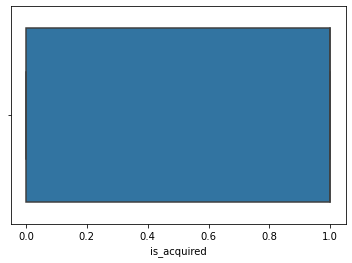

relationships


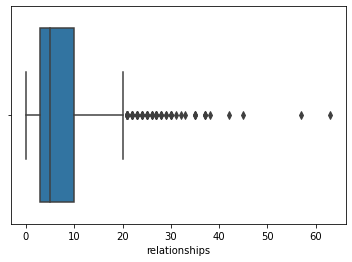

funding_rounds


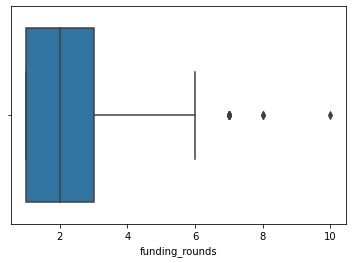

milestones


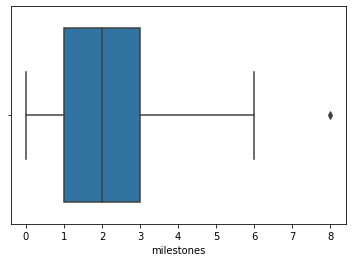

avg_participants


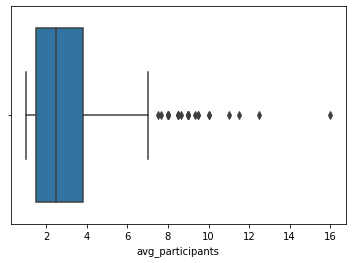

In [15]:
for item in numerical_variables.columns: # iterate over all numerical columns and show the boxplot for each
    print(item)
    sns.boxplot(x = numerical_variables[item])
    plt.show()

(923, 16)
(906, 16)


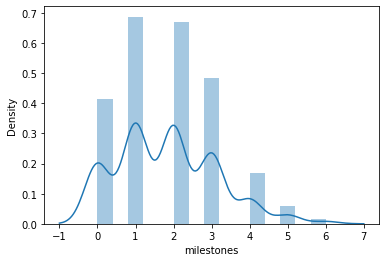

(906, 16)
(906, 16)


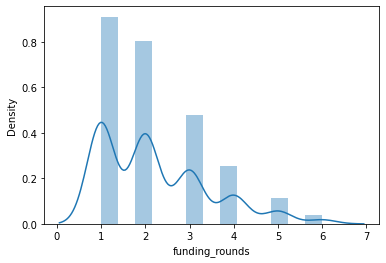

In [16]:
columns_to_drop = ['milestones', 'funding_rounds'] # columns with outliers to drop
for drop in columns_to_drop:             # iterate over the columns to drop
    print(dataset.shape)                    # dataframe shape before drops
    
    Q1 = dataset.quantile(0.25) # first quantile
    Q3 = dataset.quantile(0.75) # third quantile
    IQR = Q3 - Q1            # inter quantile range

    dataset = dataset[~(                                 # negation so we get the datapoints within the whiskers
        (dataset[columns_to_drop] < (Q1 - 1.5 * IQR)) # datapoints left of the "left whisker"
        |(dataset[columns_to_drop] > (Q3 + 1.5 * IQR) # datapoints right of the 'right whisker'
        )).any(axis=1)]
    
    print(dataset.shape)                    # data frame shape after drops
    sns.distplot(dataset[drop])
    plt.show()

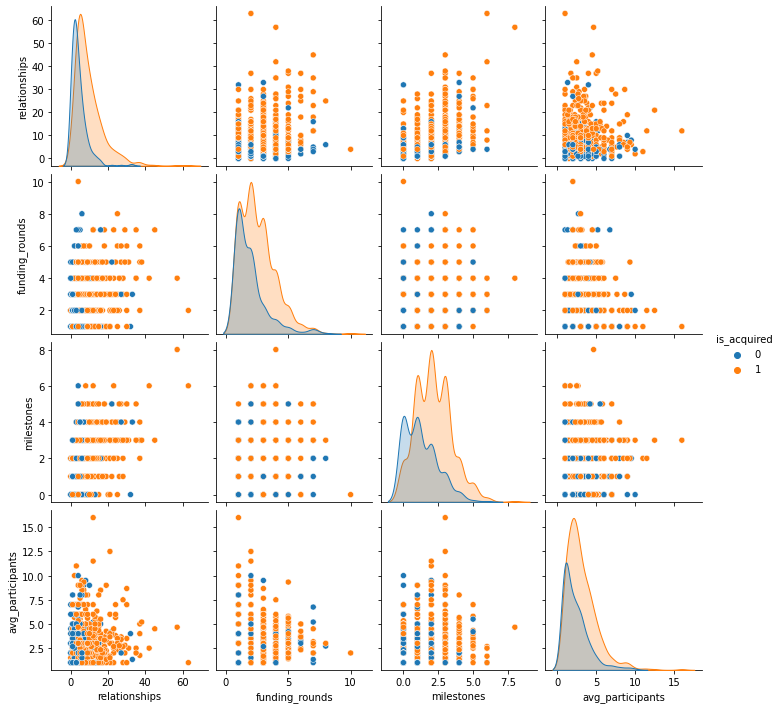

In [17]:
sns.pairplot(numerical_variables, hue = 'is_acquired')

In [18]:
#for feature in numerical_variables:
#    sns.lmplot(x=feature, y="is_acquired", data=numerical_variables, logistic= True) # logit regression on #variables X= feature, y=Purchased

In [19]:
numerical_variables.columns.to_list()

['is_acquired',
 'relationships',
 'funding_rounds',
 'milestones',
 'avg_participants']

# turn first_funding_at and last_funding_at into numerical variables: time_between_first_funding_and_foundation?

In [20]:
split_feature = 'is_acquired'       # choose feature to split
x = dataset[numerical_variables.columns.drop(split_feature)] # features
y = dataset[split_feature]    

In [21]:
#x['founded_at'] = pd.to_datetime(x['founded_at'])
#x['first_funding_at'] = pd.to_datetime(x['first_funding_at'])
#x['last_funding_at'] = pd.to_datetime(x['last_funding_at'])
x

,relationships,funding_rounds,milestones,avg_participants
0,3,3,3,1.0000
1,9,4,1,4.7500
2,5,1,2,4.0000
3,5,3,1,3.3333
4,2,2,1,1.0000
...,...,...,...,...
918,9,1,2,6.0000
919,1,3,1,2.6667
920,5,1,1,8.0000
921,12,2,2,1.0000


In [22]:
#x['days_to_first_funding'] = (x['founded_at']-x['first_funding_at']).abs()
#x['days_to_first_funding'] = x['days_to_first_funding'].dt.days
#x.describe()

In [23]:
#x['first_fund_to_last_fund'] = (x['first_funding_at']-x['last_funding_at']).abs()
#x['first_fund_to_last_fund'] = x['first_fund_to_last_fund'].dt.days
#x.describe()

In [24]:
x.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 906 entries, 0 to 922
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   relationships     906 non-null    int64  
 1   funding_rounds    906 non-null    int64  
 2   milestones        906 non-null    int64  
 3   avg_participants  906 non-null    float64
dtypes: float64(1), int64(3)
memory usage: 35.4 KB


In [25]:
#drop_columns = ['first_funding_at', 'founded_at', 'last_funding_at','city']
#x = x.drop(columns=drop_columns) # dropping low impact columns
x_features = x.columns.to_list()

In [26]:
#x = pd.get_dummies(x, drop_first = True) # dummification
#x_features = x.columns.to_list()         # safe feature list for later
#x

# TRAIN TEST SPLIT

In [27]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 42) # train test split with test size 20%

In [28]:
numerical_transformer = StandardScaler() #initialization of the method

In [29]:
reg = LinearRegression() #initialization of the method
#from sklearn.ensemble import GradientBoostingRegressor 
#reg = GradientBoostingRegressor()

In [30]:
reg.fit(X_train, y_train) # train on the train data

LinearRegression()

In [31]:
predictions_train = reg.predict(X_train) # create predictions for our train data
predictions_test = reg.predict(X_test)

In [32]:
from sklearn.metrics import r2_score

r2_train = r2_score(y_train, predictions_train) # calculate r2 score for train data
r2_test = r2_score(y_test, predictions_test)    # calculate r2 score for test data

print('R2 value for train: {}'.format(r2_train))
print('R2 value for test: {}'.format(r2_test)) 

R2 value for train: 0.20659398947235952
R2 value for test: 0.14984102686002132


In [33]:
# Feature importance 
feature_importance = pd.DataFrame({ 
    "feature_names": x_features,
    "coefficients": abs(reg.coef_)
})

feature_importance.sort_values(["coefficients"], ascending=False) # Ranking the features

,feature_names,coefficients
2,milestones,0.069847
1,funding_rounds,0.040449
3,avg_participants,0.035065
0,relationships,0.017638


# LOGARITHMIC

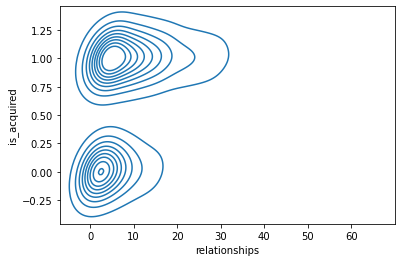

In [34]:
sns.kdeplot(x='relationships', y= "is_acquired", data=numerical_variables)
plt.show()

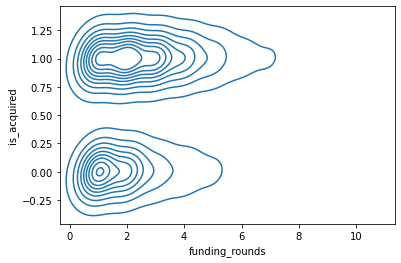

In [35]:
sns.kdeplot(x='funding_rounds', y= "is_acquired", data=numerical_variables)
plt.show()

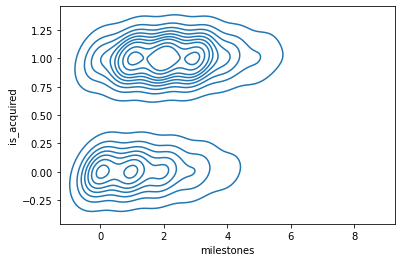

In [36]:
sns.kdeplot(x='milestones', y= "is_acquired", data=numerical_variables)
plt.show()

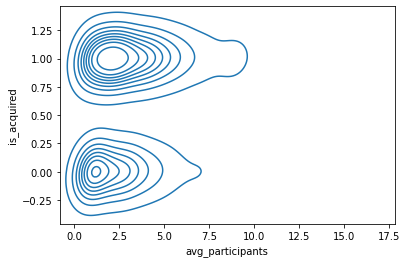

In [37]:
sns.kdeplot(x='avg_participants', y= "is_acquired", data=numerical_variables)
plt.show()

In [38]:
preprocessor =StandardScaler()

X_train = preprocessor.fit_transform(X_train)
## age_train --> (age_train - avg(age_train))/ std(age_train)

X_test = preprocessor.transform(X_test)

## age_test ---> (age_test - (avg(age_train)))/std(age_train)


In [39]:
#encoder = LabelEncoder()

#y_train = encoder.fit_transform(y_train)
#y_test = encoder.transform(y_test)

In [40]:
classifier = LogisticRegression()

classifier.fit(X_train, y_train)

LogisticRegression()

In [41]:
pred_train = classifier.predict(X_train)
pred_train

array([1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,

In [42]:
prob_train = classifier.predict_proba(X_train)
prob_train

array([[0.43718799, 0.56281201],
       [0.02588638, 0.97411362],
       [0.70091618, 0.29908382],
       ...,
       [0.39311393, 0.60688607],
       [0.50643651, 0.49356349],
       [0.02964902, 0.97035098]])

In [43]:
pred_test = classifier.predict(X_test)
pred_test

array([1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 0, 0, 1, 0, 0], dtype=int64)

In [44]:
prob_test = classifier.predict_proba(X_test)
prob_test

array([[4.46564304e-02, 9.55343570e-01],
       [4.08707829e-01, 5.91292171e-01],
       [4.80373612e-01, 5.19626388e-01],
       [4.46299581e-01, 5.53700419e-01],
       [6.41550309e-01, 3.58449691e-01],
       [3.24315562e-01, 6.75684438e-01],
       [1.79264113e-02, 9.82073589e-01],
       [5.04245596e-01, 4.95754404e-01],
       [1.70633305e-01, 8.29366695e-01],
       [4.23440008e-01, 5.76559992e-01],
       [3.42797304e-01, 6.57202696e-01],
       [2.07097028e-01, 7.92902972e-01],
       [4.70473486e-01, 5.29526514e-01],
       [6.44968477e-01, 3.55031523e-01],
       [4.70550185e-01, 5.29449815e-01],
       [2.33610393e-01, 7.66389607e-01],
       [5.86102502e-01, 4.13897498e-01],
       [1.23523927e-01, 8.76476073e-01],
       [6.47613685e-02, 9.35238631e-01],
       [3.50582290e-01, 6.49417710e-01],
       [4.27725241e-01, 5.72274759e-01],
       [2.66188245e-03, 9.97338118e-01],
       [3.27392701e-01, 6.72607299e-01],
       [2.59377601e-01, 7.40622399e-01],
       [1.029635

In [45]:
## accuracy/ f1 score

print("accuracy on train set: ", accuracy_score(y_train, pred_train))
print("accuracy on test set: ", accuracy_score(y_test, pred_test))

accuracy on train set:  0.7596685082872928
accuracy on test set:  0.7802197802197802


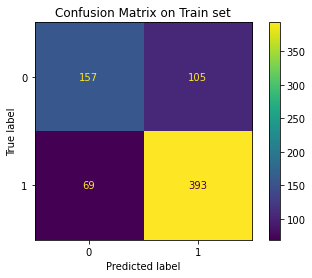

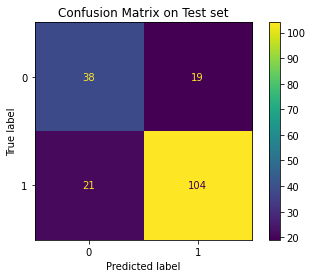

In [46]:
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Train set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier, X_train, y_train, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="Confusion Matrix on Test set") # Set a title that we will add into ConfusionMatrixDisplay
ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, ax=ax) # ConfusionMatrixDisplay from sklearn
plt.show()

In [47]:
from sklearn.metrics import classification_report

In [48]:
print(classification_report(y_train, pred_train))

print(classification_report(y_test, pred_test))

              precision    recall  f1-score   support

           0       0.69      0.60      0.64       262
           1       0.79      0.85      0.82       462

    accuracy                           0.76       724
   macro avg       0.74      0.72      0.73       724
weighted avg       0.75      0.76      0.76       724

              precision    recall  f1-score   support

           0       0.64      0.67      0.66        57
           1       0.85      0.83      0.84       125

    accuracy                           0.78       182
   macro avg       0.74      0.75      0.75       182
weighted avg       0.78      0.78      0.78       182



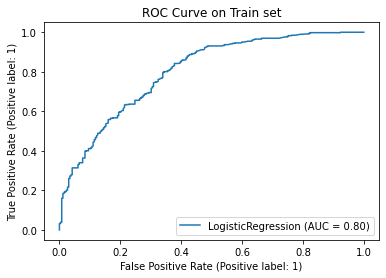

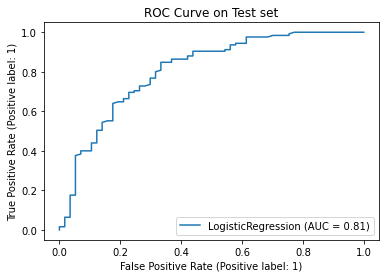

In [49]:
# Visualize ROC curves
_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="ROC Curve on Train set") # Set a title that we will add into ConfusionMatrixDisplay
RocCurveDisplay.from_estimator(classifier, X_train, y_train, ax=ax) # RocCurveDisplay from sklearn
plt.show()

_ , ax = plt.subplots() # Get subplot from matplotlib
ax.set(title="ROC Curve on Test set") # Set a title that we will add into ConfusionMatrixDisplay
RocCurveDisplay.from_estimator(classifier, X_test, y_test, ax=ax) # RocCurveDisplay from sklearn
plt.show()